# Fst 

In [29]:
import glob
import re
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Find files recursively em sub directories
files = glob.glob("*_populations*/populations.fst_summary.tsv", recursive=True)  # Find in all sub directories
print(f"Find {len(files)} files")



Find 12 files


In [11]:
files

['grp_populations_50/populations.fst_summary.tsv',
 'grp_populations_95/populations.fst_summary.tsv',
 'alti_populations_95/populations.fst_summary.tsv',
 'alti_populations_50/populations.fst_summary.tsv',
 'alti_populations_80/populations.fst_summary.tsv',
 'phylo_populations_50/populations.fst_summary.tsv',
 'grp_populations_80/populations.fst_summary.tsv',
 'phylo_populations_95/populations.fst_summary.tsv',
 'grp_populations_90/populations.fst_summary.tsv',
 'phy_populations_80/populations.fst_summary.tsv',
 'alti_populations_90/populations.fst_summary.tsv',
 'phylo_populations_90/populations.fst_summary.tsv']

In [31]:
fst_data = {}

In [33]:
del col
del dataframes


In [32]:
for file in files:
    # read the .tsv file
    df = pd.read_csv(file, sep='\t', index_col=0)
    
    # Use regex to extract the name of each folder
    # Look for: (grp|alti|phylo|phy) followed of  _populations_ + numbers
    match = re.search(r'(grp|alti|phylo|phy).*?(\d+)', file)
    
    if match:
        group = match.group(1)
        number = match.group(2)
        
        # Padronizar nomes
        if group == 'phy':
            group = 'phylo'
        
        name = f"{group}{number}"
    else:
        # Fallback: usar o nome do diretório
        name = os.path.basename(os.path.dirname(file))
    df = df.round(2)
    fst_data[name] = df

    print(f"Carregado: {name} <- {file}")

Carregado: grp50 <- grp_populations_50/populations.fst_summary.tsv
Carregado: grp95 <- grp_populations_95/populations.fst_summary.tsv
Carregado: alti95 <- alti_populations_95/populations.fst_summary.tsv
Carregado: alti50 <- alti_populations_50/populations.fst_summary.tsv
Carregado: alti80 <- alti_populations_80/populations.fst_summary.tsv
Carregado: phylo50 <- phylo_populations_50/populations.fst_summary.tsv
Carregado: grp80 <- grp_populations_80/populations.fst_summary.tsv
Carregado: phylo95 <- phylo_populations_95/populations.fst_summary.tsv
Carregado: grp90 <- grp_populations_90/populations.fst_summary.tsv
Carregado: phylo80 <- phy_populations_80/populations.fst_summary.tsv
Carregado: alti90 <- alti_populations_90/populations.fst_summary.tsv
Carregado: phylo90 <- phylo_populations_90/populations.fst_summary.tsv


In [27]:
print(list(fst_data.keys()))

['grp50', 'grp95', 'alti95', 'alti50', 'alti80', 'phylo50', 'grp80', 'phylo95', 'grp90', 'phylo80', 'alti90', 'phylo90']


In [ ]:
# chaves_para_remover = ['grp80', 'grp90', 'grp95']
# for chave in chaves_para_remover:
#     if chave in fst_data:
#         del fst_data[chave]

In [35]:
fst_order = []
for group in ['grp', 'alti', 'phylo']:
    for number in ['50', '80', '90', '95']:
        key = f"{group}{number}"
        if key in fst_data:
            fst_order.append(key)

print("Ordered datasets:", fst_order)

Ordered datasets: ['grp50', 'grp80', 'grp90', 'grp95', 'alti50', 'alti80', 'alti90', 'alti95', 'phylo50', 'phylo80', 'phylo90', 'phylo95']


In [39]:
# plot the fst in a heat map for all 
n_plots = len(fst_data)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

palets = {
    'grp': 'YlOrRd', 
    'alti': 'Blues',    
    'phylo': 'Greens'  
}

# Plotar organizado por colunas
for idx, key in enumerate(fst_order):
    df = fst_data[key]
    
    # Determinar posição no grid
    group = key[:-2]  # 'grp', 'alti', 'phylo'
    number = key[-2:] # '50', '80', '90', '95'
    
    # Mapear para coordenadas do grid
    col_map = {'grp': 0, 'alti': 1, 'phylo': 2}
    row_map = {'50': 0, '80': 1, '90': 2, '95': 3}
    
    col = col_map[group]
    row = row_map[number]
    
    ax = axes[row, col]
    
    # Usar paleta específica para cada grupo
    cmap = palets[group]
    
    # Plotar heatmap
    sns.heatmap(df,
                annot=True, 
                fmt=".2f",  # 2 casas decimais
                cmap=cmap,
                square=True,
                cbar_kws={'shrink': 0.6},
                ax=ax,
                vmin=0,    # Valor mínimo para escala de cores
                vmax=0.15) # Valor máximo para escala de cores (ajuste conforme seus dados)
    
    ax.set_title(f'{group.upper()} {number}%', fontweight='bold', fontsize=14)
    
    # Melhorar aparência dos labels
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# Adicionar títulos nas colunas
for col, group in enumerate(['GRP', 'ALTI', 'PHYLO']):
    axes[0, col].set_title(f'{group}\n', fontsize=16, fontweight='bold', pad=20)

# Adicionar labels nas linhas
for row, number in enumerate(['50%', '80%', '90%', '95%']):
    axes[row, 0].set_ylabel(f'{number}\n', rotation=90, fontsize=14, fontweight='bold', labelpad=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.3, hspace=0.4)
plt.suptitle('FST Matrix Comparison by Group and Threshold', fontsize=18, fontweight='bold')
plt.show()

# Verificar dados
print("\nDatasets carregados e ordenados:")
for key in fst_order:
    df = fst_data[key]
    print(f"{key}: {df.shape}")
    print(f"Valores: {df.stack().dropna().unique()}")
    print()

<Figure size 640x480 with 0 Axes>


Datasets carregados e ordenados:
grp50: (3, 4)
Valores: [0.16 0.25 0.3  0.27 0.34 0.26]

grp80: (3, 4)
Valores: [0.14 0.26 0.3  0.27 0.31 0.23]

grp90: (3, 4)
Valores: [0.15 0.34 0.38 0.31 0.32 0.22]

grp95: (3, 4)
Valores: [0.16 0.44 0.45 0.39 0.35 0.26]

alti50: (2, 3)
Valores: [0.04 0.1  0.08]

alti80: (2, 3)
Valores: [0.03 0.09 0.08]

alti90: (2, 3)
Valores: [0.03 0.09 0.08]

alti95: (2, 3)
Valores: [0.03 0.09]

phylo50: (4, 5)
Valores: [0.33 0.38 0.35 0.3  0.28 0.25 0.29]

phylo80: (4, 5)
Valores: [0.31 0.36 0.33 0.28 0.25 0.23 0.27 0.26]

phylo90: (4, 5)
Valores: [0.3  0.35 0.33 0.31 0.27 0.25 0.22 0.26]

phylo95: (4, 5)
Valores: [0.3  0.35 0.33 0.31 0.26 0.24 0.22]



Datasets ordenados: ['grp50', 'grp80', 'grp90', 'grp95', 'alti50', 'alti80', 'alti90', 'alti95', 'phylo50', 'phylo80', 'phylo90', 'phylo95']


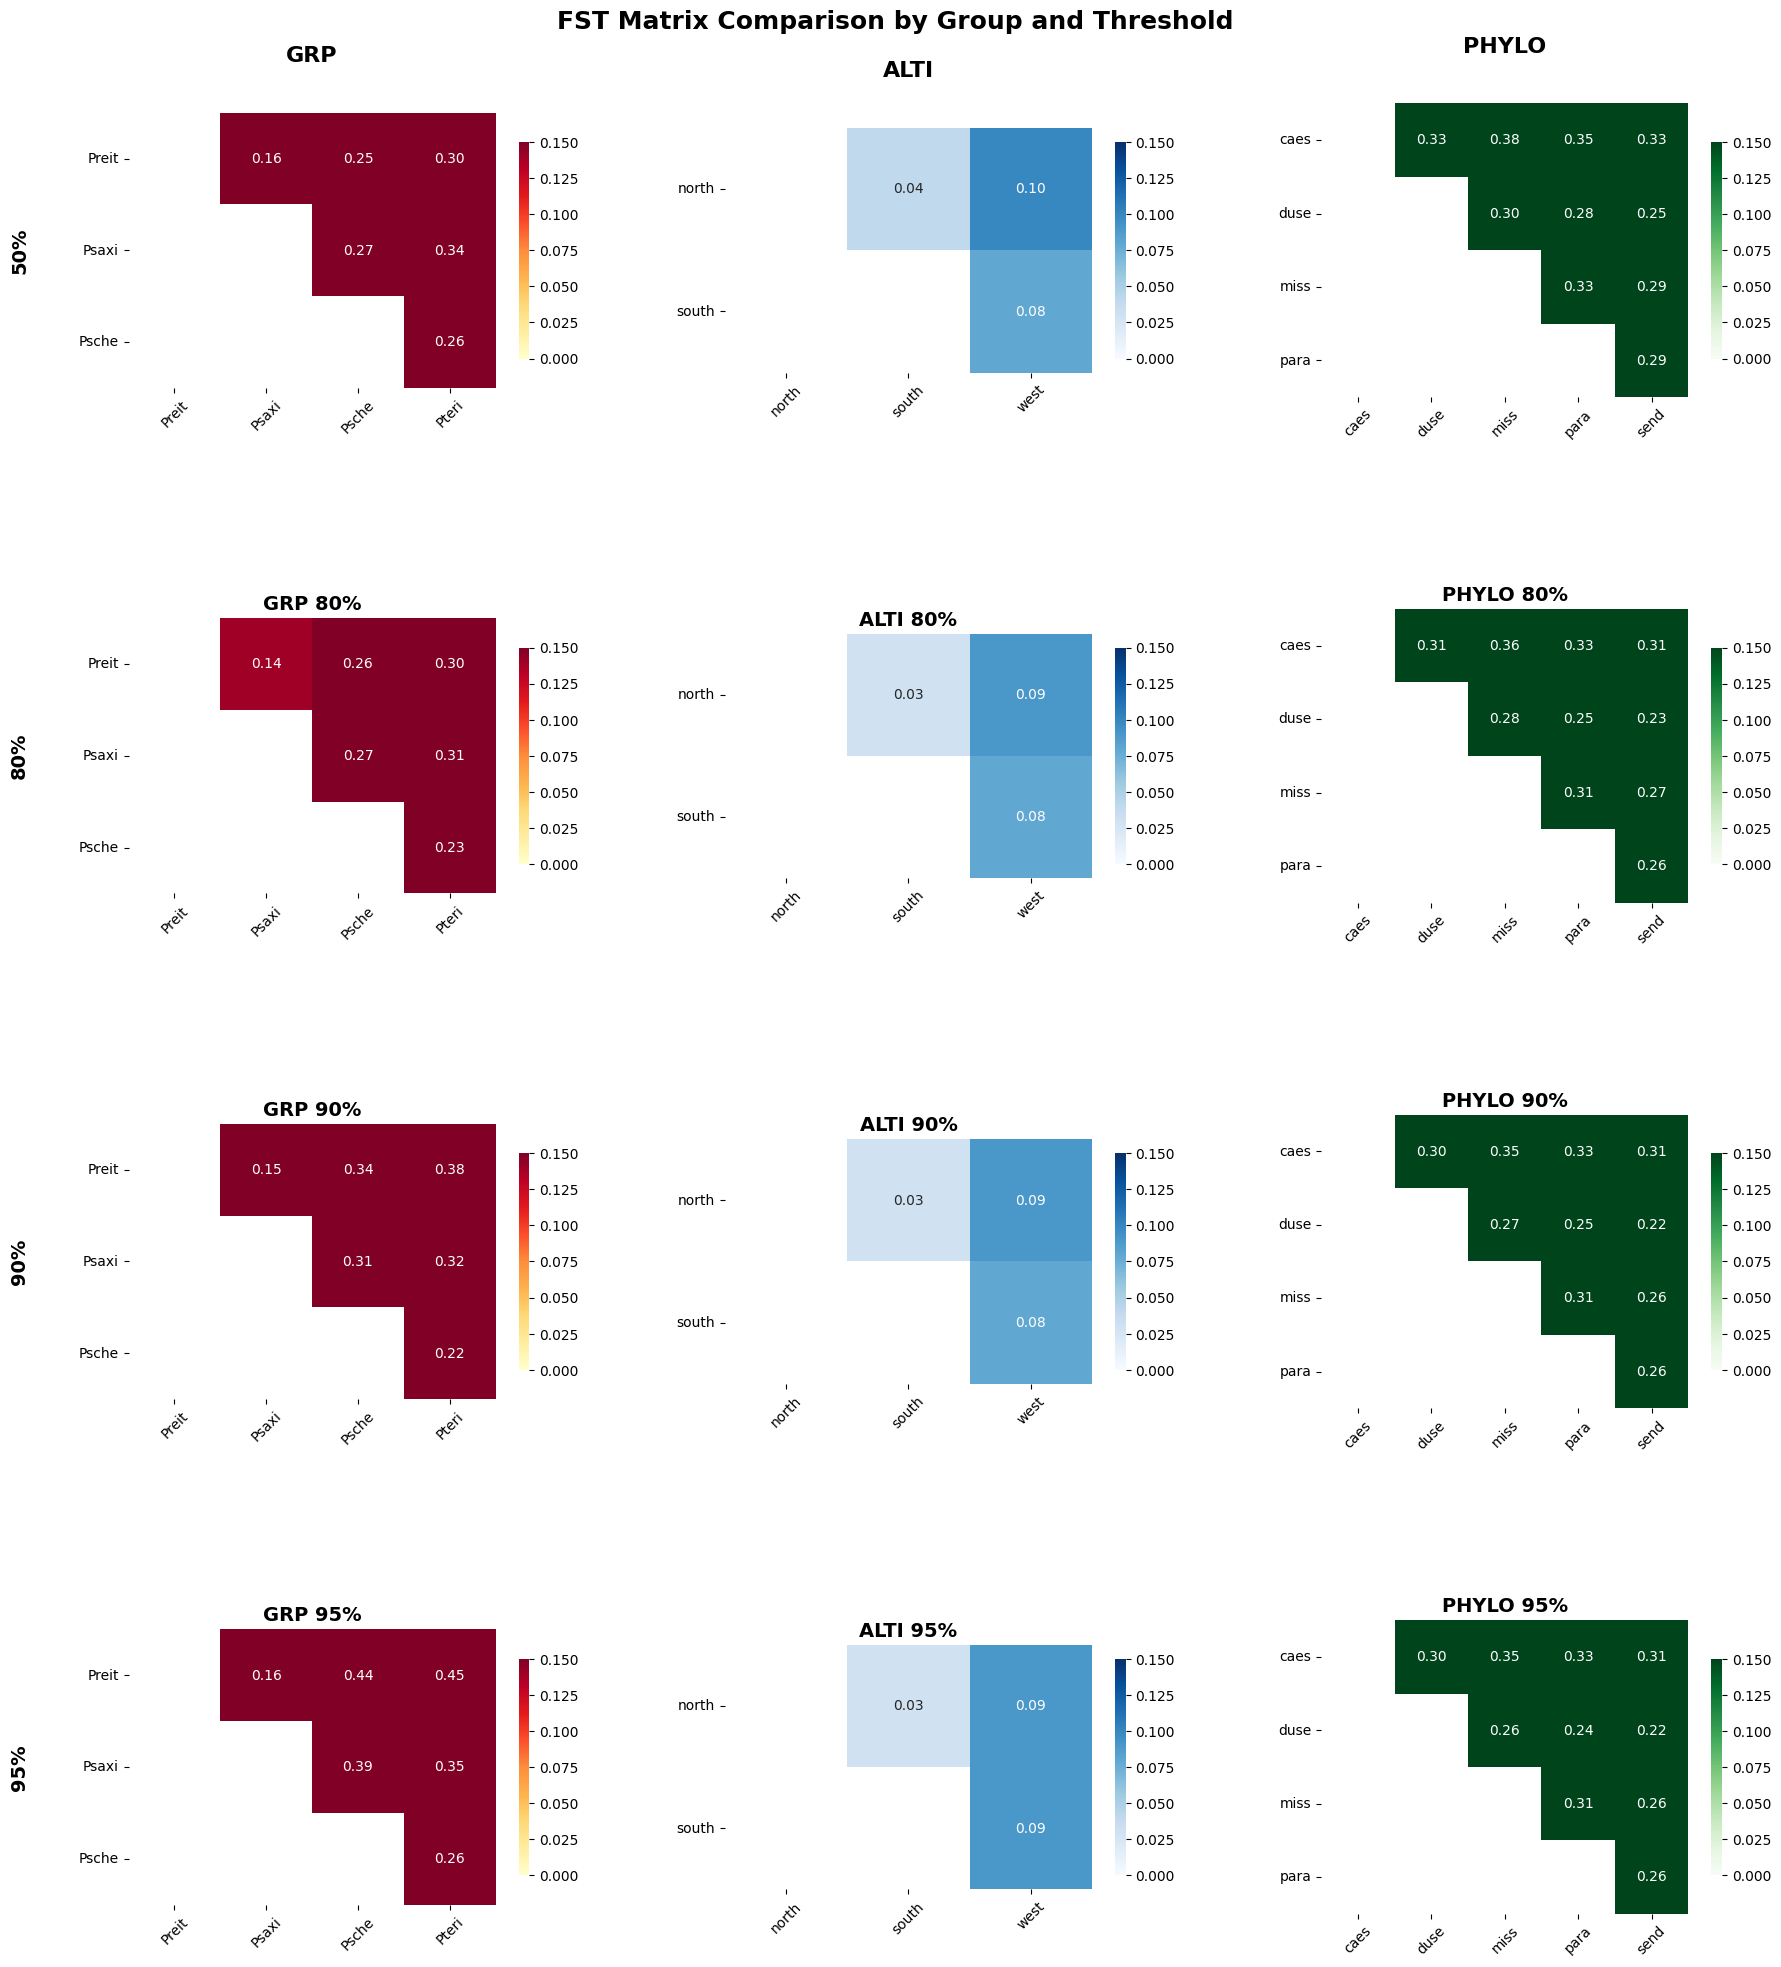


Datasets carregados e ordenados:
grp50: (3, 4)
Valores: [0.16 0.25 0.3  0.27 0.34 0.26]

grp80: (3, 4)
Valores: [0.14 0.26 0.3  0.27 0.31 0.23]

grp90: (3, 4)
Valores: [0.15 0.34 0.38 0.31 0.32 0.22]

grp95: (3, 4)
Valores: [0.16 0.44 0.45 0.39 0.35 0.26]

alti50: (2, 3)
Valores: [0.04 0.1  0.08]

alti80: (2, 3)
Valores: [0.03 0.09 0.08]

alti90: (2, 3)
Valores: [0.03 0.09 0.08]

alti95: (2, 3)
Valores: [0.03 0.09]

phylo50: (4, 5)
Valores: [0.33 0.38 0.35 0.3  0.28 0.25 0.29]

phylo80: (4, 5)
Valores: [0.31 0.36 0.33 0.28 0.25 0.23 0.27 0.26]

phylo90: (4, 5)
Valores: [0.3  0.35 0.33 0.31 0.27 0.25 0.22 0.26]

phylo95: (4, 5)
Valores: [0.3  0.35 0.33 0.31 0.26 0.24 0.22]



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Lista dos seus arquivos
files = [
    'grp_populations_50/populations.fst_summary.tsv',
    'grp_populations_95/populations.fst_summary.tsv',
    'alti_populations_95/populations.fst_summary.tsv',
    'alti_populations_50/populations.fst_summary.tsv',
    'alti_populations_80/populations.fst_summary.tsv',
    'phylo_populations_50/populations.fst_summary.tsv',
    'grp_populations_80/populations.fst_summary.tsv',
    'phylo_populations_95/populations.fst_summary.tsv',
    'grp_populations_90/populations.fst_summary.tsv',
    'phy_populations_80/populations.fst_summary.tsv',
    'alti_populations_90/populations.fst_summary.tsv',
    'phylo_populations_90/populations.fst_summary.tsv'
]

# Criar dicionário para armazenar os DataFrames
fst_data = {}

# Carregar cada arquivo
for file in files:
    # Ler o arquivo TSV
    df = pd.read_csv(file, sep='\t', index_col=0)
    
    # Extrair nome
    match = re.search(r'(grp|alti|phylo|phy).*?(\d+)', file)
    if match:
        grupo = match.group(1)
        numero = match.group(2)
        if grupo == 'phy': grupo = 'phylo'
        name = f"{grupo}{numero}"
    else:
        name = os.path.basename(os.path.dirname(file))
    
    # Arredondar para 2 casas decimais
    df = df.round(2)
    
    fst_data[name] = df

# ORDENAR: criar lista ordenada dos datasets
# Ordem: grp50, grp80, grp90, grp95, alti50, alti80, alti90, alti95, phylo50, phylo80, phylo90, phylo95
grupos_ordenados = []
for grupo in ['grp', 'alti', 'phylo']:
    for numero in ['50', '80', '90', '95']:
        chave = f"{grupo}{numero}"
        if chave in fst_data:
            grupos_ordenados.append(chave)

print("Datasets ordenados:", grupos_ordenados)

# Criar figura com organização por colunas
n_cols = 3  # Uma coluna para cada grupo (grp, alti, phylo)
n_rows = 4  # Uma linha para cada número (50, 80, 90, 95)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))

# Paleta de cores diferente para cada grupo
paletas = {
    'grp': 'YlOrRd',    # Amarelo-Laranja-Vermelho
    'alti': 'Blues',    # Azuis
    'phylo': 'Greens'   # Verdes
}

# Plotar organizado por colunas
for idx, chave in enumerate(grupos_ordenados):
    df = fst_data[chave]
    
    # Determinar posição no grid
    grupo = chave[:-2]  # 'grp', 'alti', 'phylo'
    numero = chave[-2:] # '50', '80', '90', '95'
    
    # Mapear para coordenadas do grid
    col_map = {'grp': 0, 'alti': 1, 'phylo': 2}
    row_map = {'50': 0, '80': 1, '90': 2, '95': 3}
    
    col = col_map[grupo]
    row = row_map[numero]
    
    ax = axes[row, col]
    
    # Usar paleta específica para cada grupo
    cmap = paletas[grupo]
    
    # Plotar heatmap
    sns.heatmap(df,
                annot=True, 
                fmt=".2f",  # 2 casas decimais
                cmap=cmap,
                square=True,
                cbar_kws={'shrink': 0.6},
                ax=ax,
                vmin=0,    # Valor mínimo para escala de cores
                vmax=0.15) # Valor máximo para escala de cores (ajuste conforme seus dados)
    
    ax.set_title(f'{grupo.upper()} {numero}%', fontweight='bold', fontsize=14)
    
    # Melhorar aparência dos labels
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# Adicionar títulos nas colunas
for col, grupo in enumerate(['GRP', 'ALTI', 'PHYLO']):
    axes[0, col].set_title(f'{grupo}\n', fontsize=16, fontweight='bold', pad=20)

# Adicionar labels nas linhas
for row, numero in enumerate(['50%', '80%', '90%', '95%']):
    axes[row, 0].set_ylabel(f'{numero}\n', rotation=90, fontsize=14, fontweight='bold', labelpad=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.3, hspace=0.4)
plt.suptitle('FST Matrix Comparison by Group and Threshold', fontsize=18, fontweight='bold')
plt.show()

# Verificar dados
print("\nDatasets carregados e ordenados:")
for chave in grupos_ordenados:
    df = fst_data[chave]
    print(f"{chave}: {df.shape}")
    print(f"Valores: {df.stack().dropna().unique()}")
    print()